In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from bb_binary import FrameContainer, Repository, load_frame_container
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import itertools
from collections import Counter

import helper as hlp
import time
import datetime
import sys
import preprocessing as prep
import helper as hlp

In [5]:
def RepoToDF(path, year):
    repo = Repository(path)
    file_list = []
    
    for f in repo.iter_fnames():
        string = f.split("/{}/".format(year))
        datum = string[1].split("/")
        file_list.append([datum[0], datum[1], datum[2], f])
    
    # DataFrame with all files
    return DataFrame(file_list, columns=['m', 'd', 'h', 'file'])

In [6]:
def NumberOfFilesPerHourDF(b, e, df, year):    
    gr = df.groupby(by=["m", "d", "h"])
    mdh = []
    c = []

    for g, group in gr:
        m,d,h = g
        files = (list(group.file))
        a = [int(f.split('/')[-1].split("_")[1]) for f in files]
        mdh.append([m,d,h])
        c.append(Counter(a))
    
    dfmdh = DataFrame(mdh, columns=["m", "d", "h"])
    
    dfc = DataFrame(c).fillna(value=0)
    dfc.columns = ["cam0", "cam1", "cam2", "cam3"]
    
    df_all = pd.concat([dfmdh, dfc], axis=1)
    df_all['summ'] = df_all.ix[:,3:].sum(axis=1)
    
    df_all.set_index(df_all.apply(lambda x: datetime.datetime(year,int(x.m),int(x.d),int(x.h)), axis=1), inplace=True)
    index = pd.date_range(b, e, freq='H')
    df_i = DataFrame(index=index)
    
    res = pd.concat([df_i, df_all], axis=1)
    
    return res.fillna(0)

# Data 2016

In [8]:
path = "/mnt/storage/beesbook/repo_season_2016_fixed/"

In [9]:
begin, end = '2016-07-19', '2016-09-19'

In [10]:
df = RepoToDF(path, '2016')

In [11]:
df_all = NumberOfFilesPerHourDF(begin, end, df, 2016)

In [34]:
df_all.iloc[list(range(20,40))]

,m,d,h,cam0,cam1,cam2,cam3,summ
2016-07-19 20:00:00,07,19,20,10.0,10.0,11.0,11.0,42.0
2016-07-19 21:00:00,07,19,21,11.0,11.0,11.0,11.0,44.0
2016-07-19 22:00:00,07,19,22,11.0,11.0,10.0,10.0,42.0
2016-07-19 23:00:00,07,19,23,10.0,10.0,11.0,11.0,42.0
2016-07-20 00:00:00,07,20,00,11.0,11.0,10.0,10.0,42.0
2016-07-20 01:00:00,07,20,01,10.0,10.0,11.0,11.0,42.0
2016-07-20 02:00:00,07,20,02,11.0,11.0,10.0,11.0,43.0
2016-07-20 03:00:00,07,20,03,11.0,10.0,11.0,10.0,42.0
2016-07-20 04:00:00,07,20,04,10.0,11.0,10.0,11.0,42.0
2016-07-20 05:00:00,07,20,05,11.0,11.0,11.0,10.0,43.0


In [13]:
sns.set_context("paper")

In [35]:
def plotDF(df, column, year, ymin=None, ymax=None):
    fig, ax = plt.subplots()
    sns.tsplot(data=df['{}'.format(column)], err_style="ci_bars", color="g", ax=ax, )
    fig.set_size_inches(50,10)
    ax.set_title("{} - {} \n Number of files per day and hour".format(year, column))
    ax.set_ylabel("Number of files")
    
    all_labels = df.index
    xmin, xmax = ax.get_xlim()
    l = [all_labels[x] for x in np.arange(int(xmin), int(xmax), 24)]
    ax.set_xticklabels(l, rotation=90)
    ax.set_xticks(np.arange(xmin, xmax, 24))
    
    if (ymin != None and ymax != None):
        ax.set_ylim(ymin,ymax)

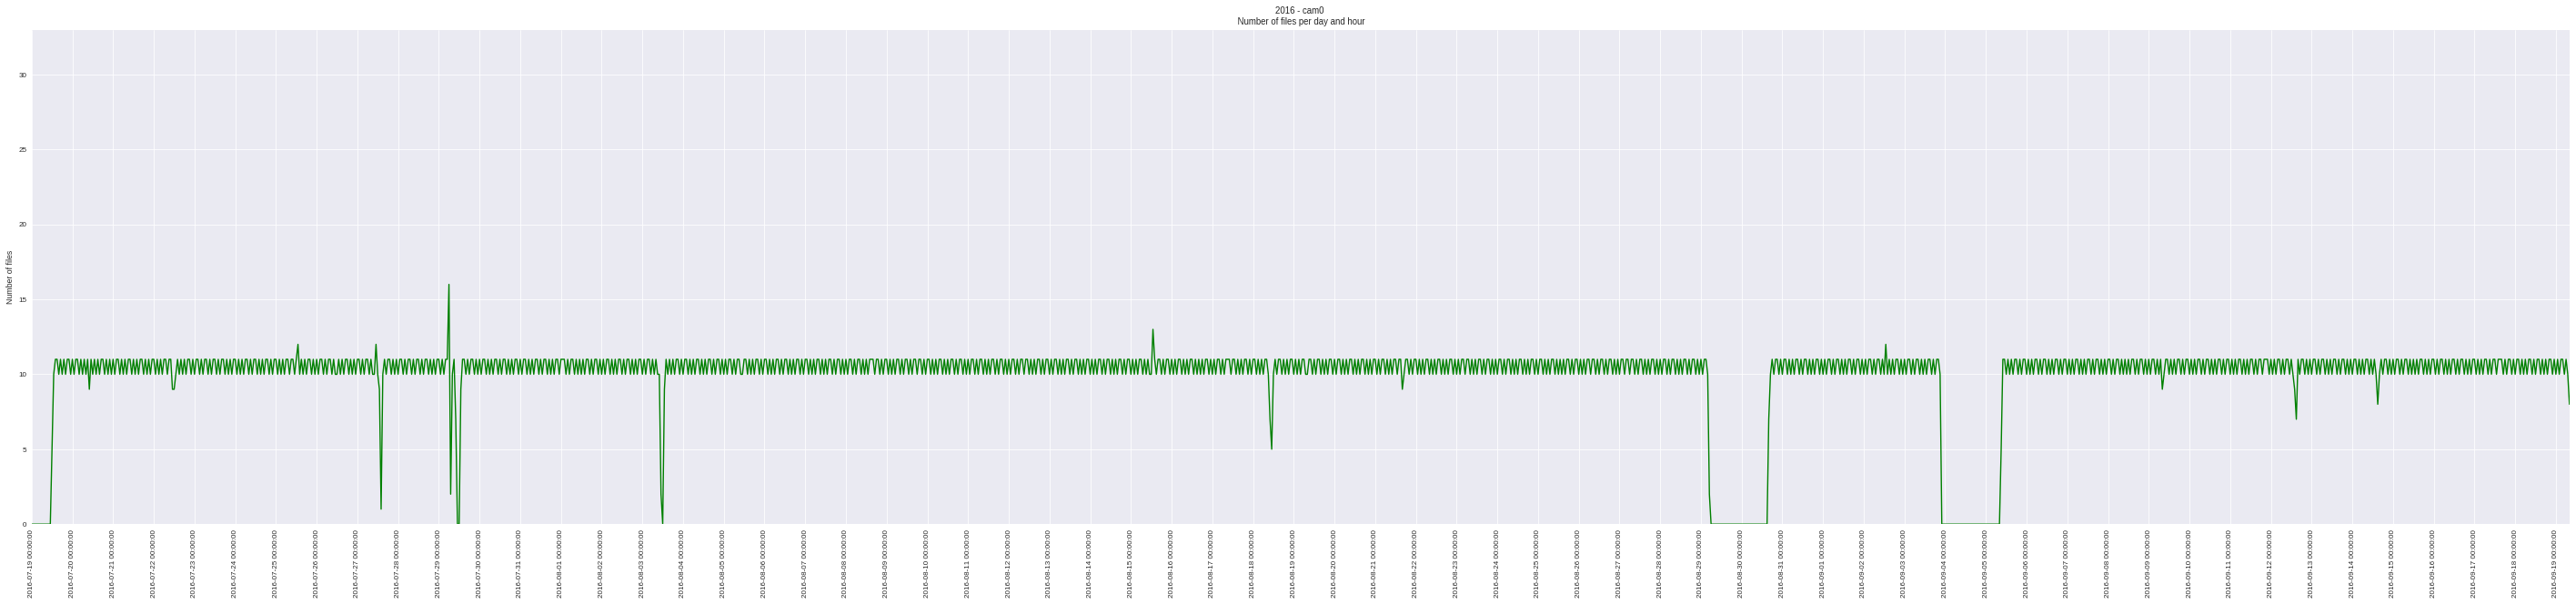

In [36]:
plotDF(df_all, 'cam0', 2016, 0,33)

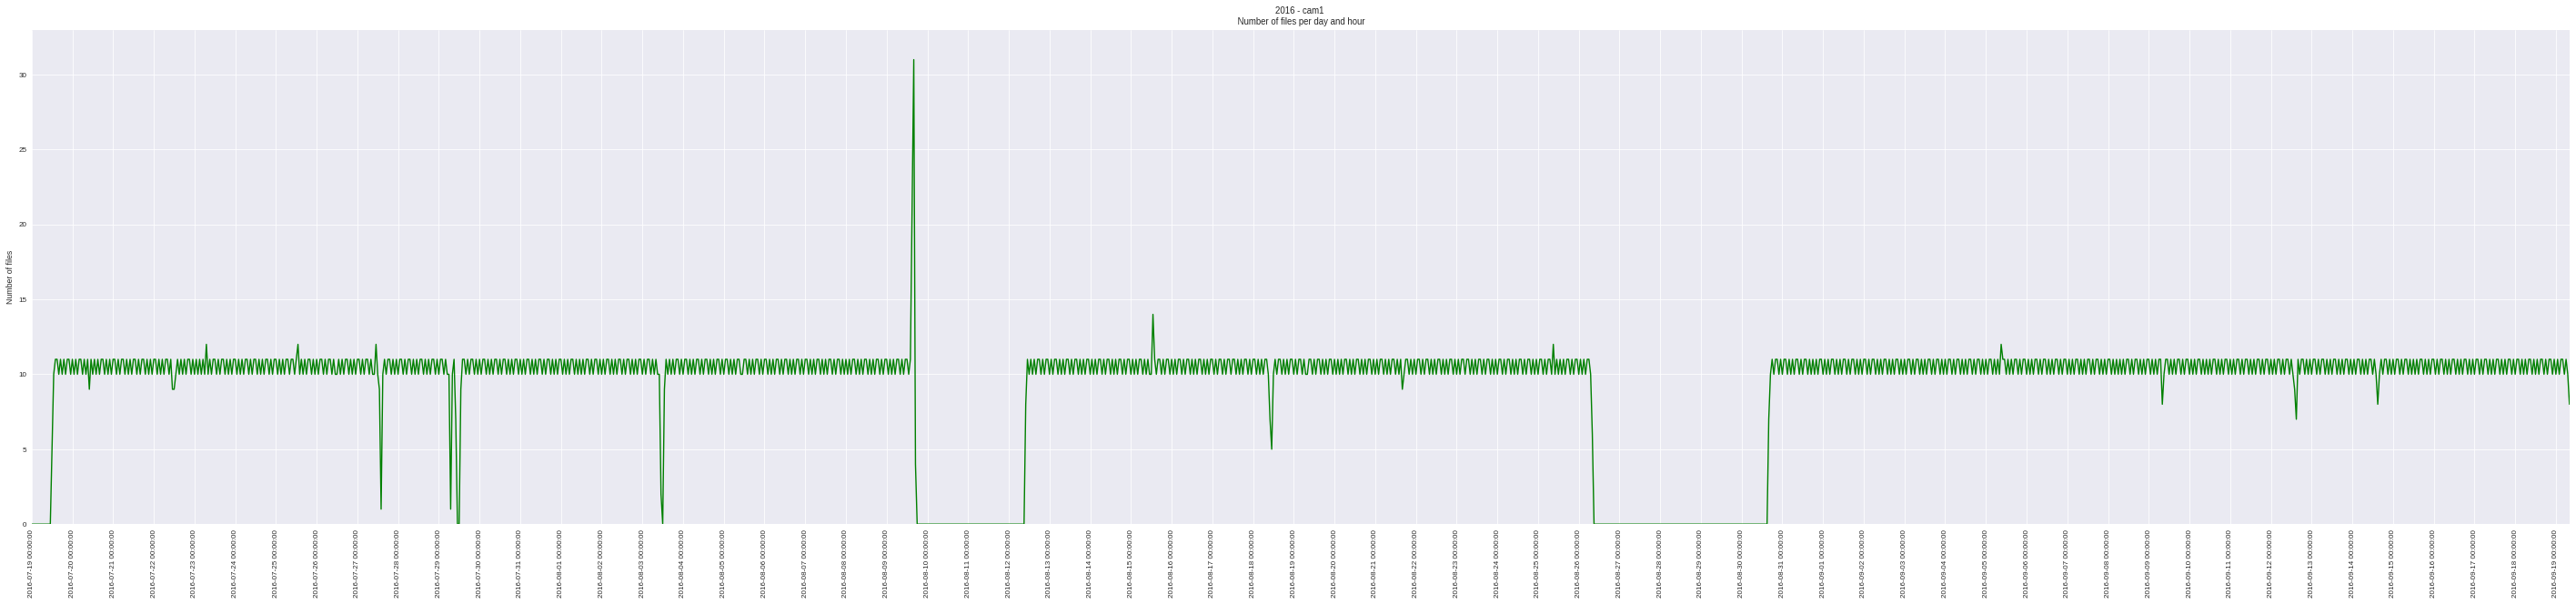

In [37]:
plotDF(df_all, 'cam1',2016,0,33)

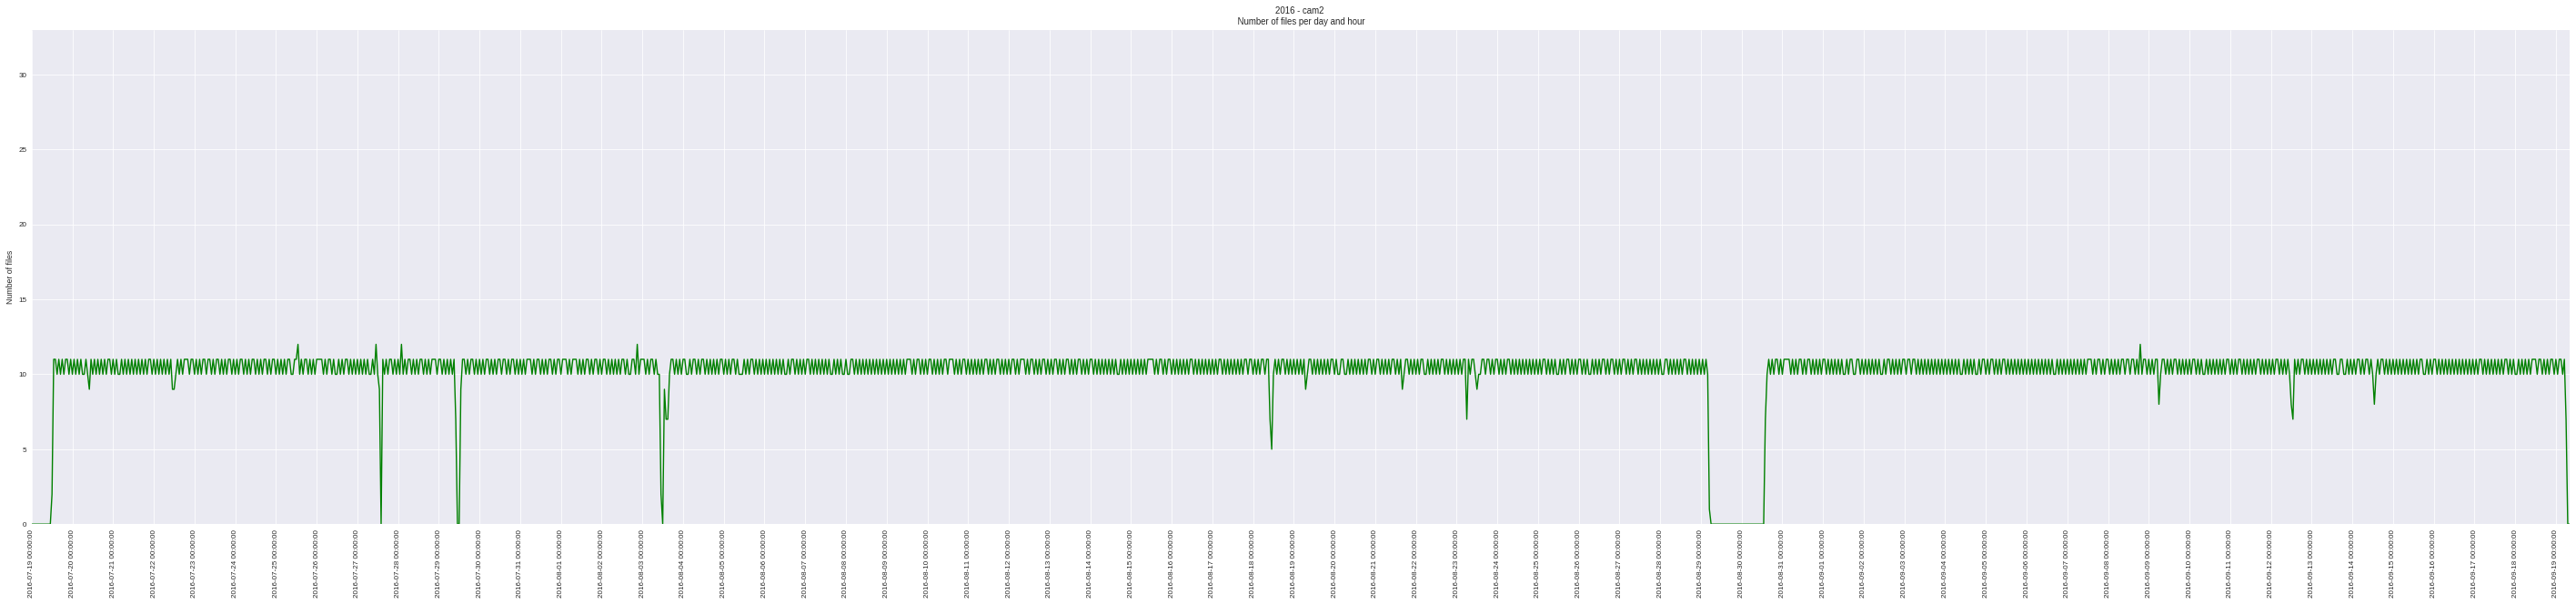

In [38]:
plotDF(df_all, 'cam2', 2016,0,33)

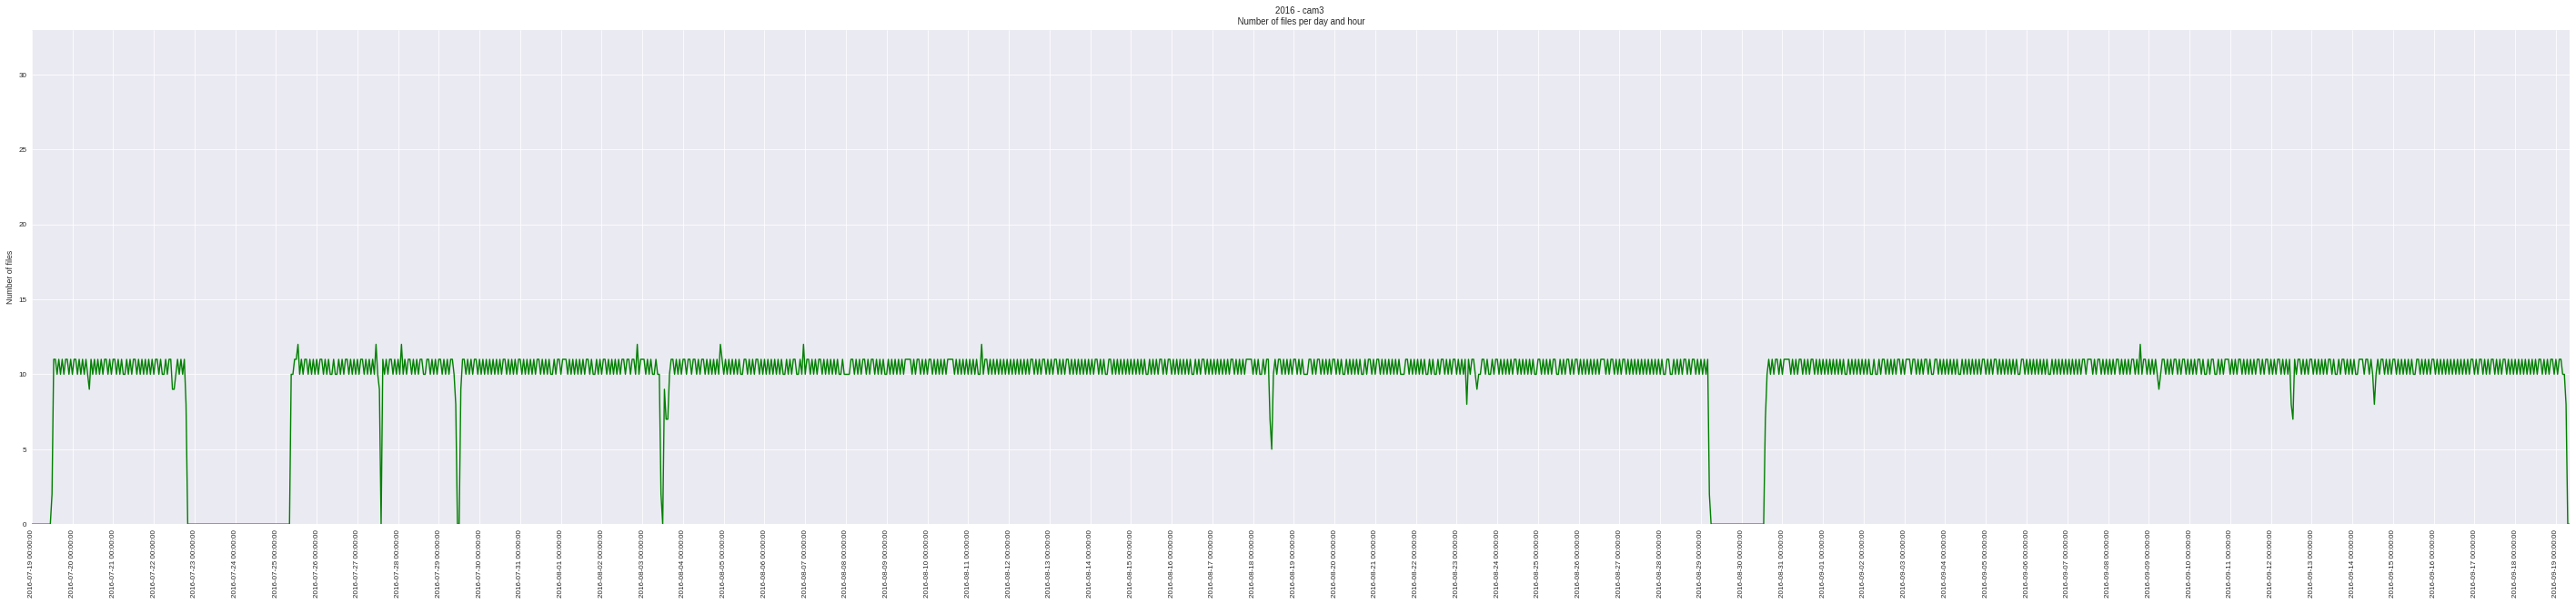

In [39]:
plotDF(df_all, 'cam3', 2016,0,33)

## All Cams 2016

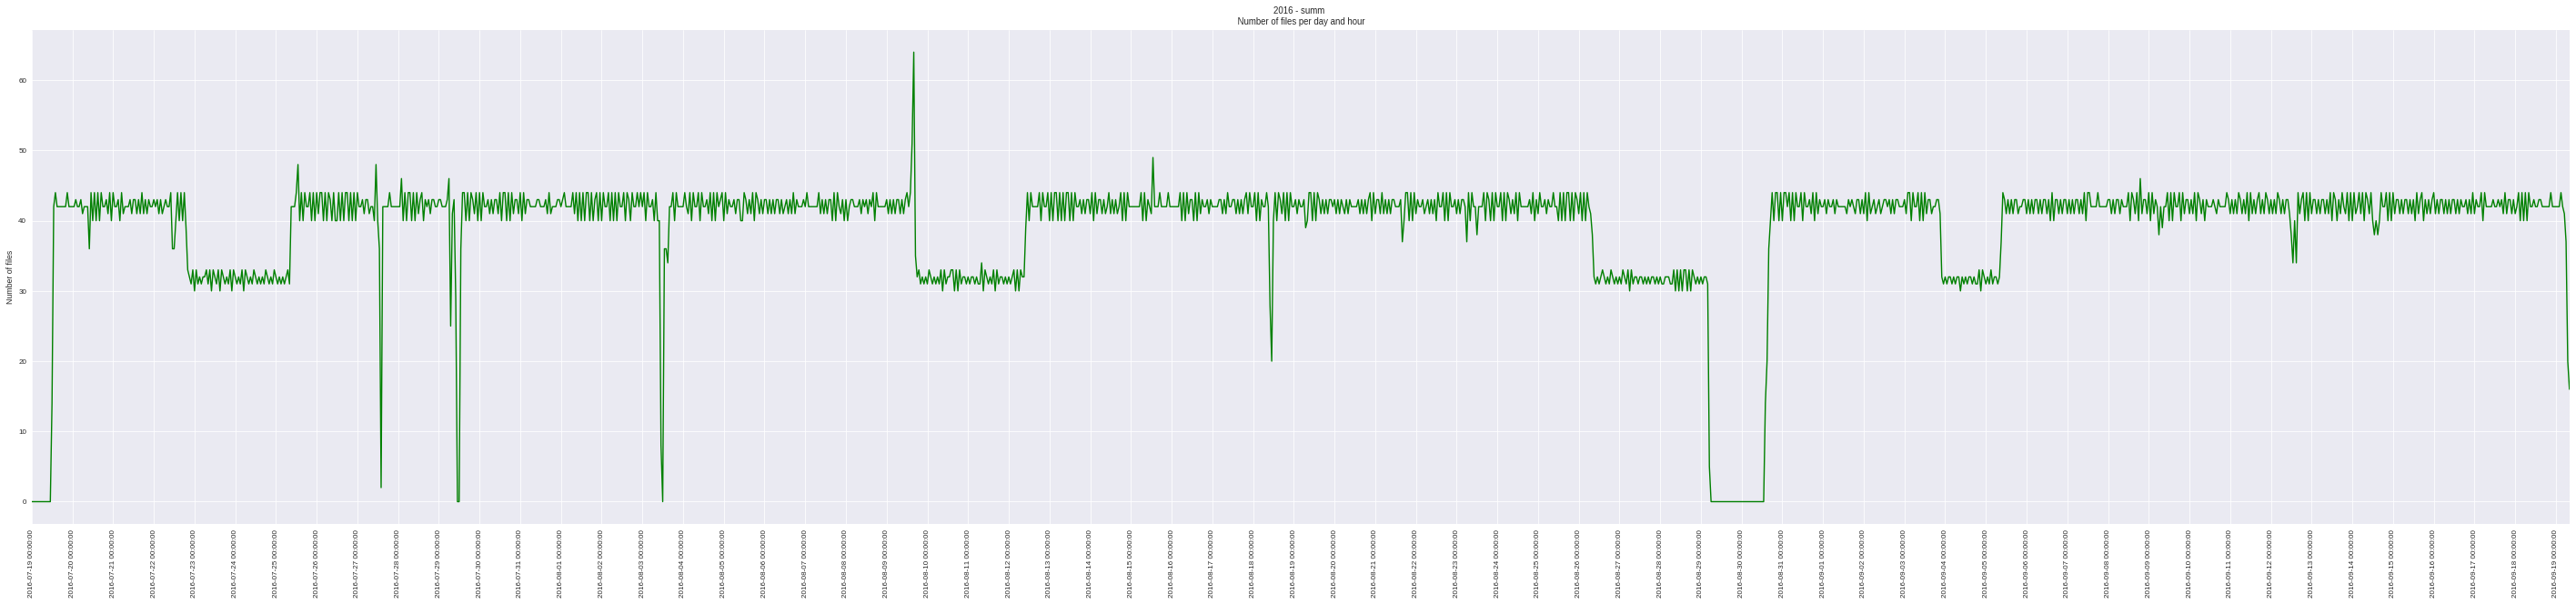

In [40]:
plotDF(df_all,'summ', 2016)

# Data 2015

In [41]:
path2 = "/mnt/storage/beesbook/repo_season_2015_fixed/"

In [42]:
df2 = RepoToDF(path2, '2015')

In [43]:
df2.tail()

,m,d,h,file
66606,10,26,10,/mnt/storage/beesbook/repo_season_2015_fixed/2...
66607,10,26,10,/mnt/storage/beesbook/repo_season_2015_fixed/2...
66608,10,26,10,/mnt/storage/beesbook/repo_season_2015_fixed/2...
66609,10,26,10,/mnt/storage/beesbook/repo_season_2015_fixed/2...
66610,10,26,10,/mnt/storage/beesbook/repo_season_2015_fixed/2...


In [44]:
b, e = '2015-08-19', '2015-10-27'

In [45]:
df_all2 = NumberOfFilesPerHourDF(b,e, df2, 2015)

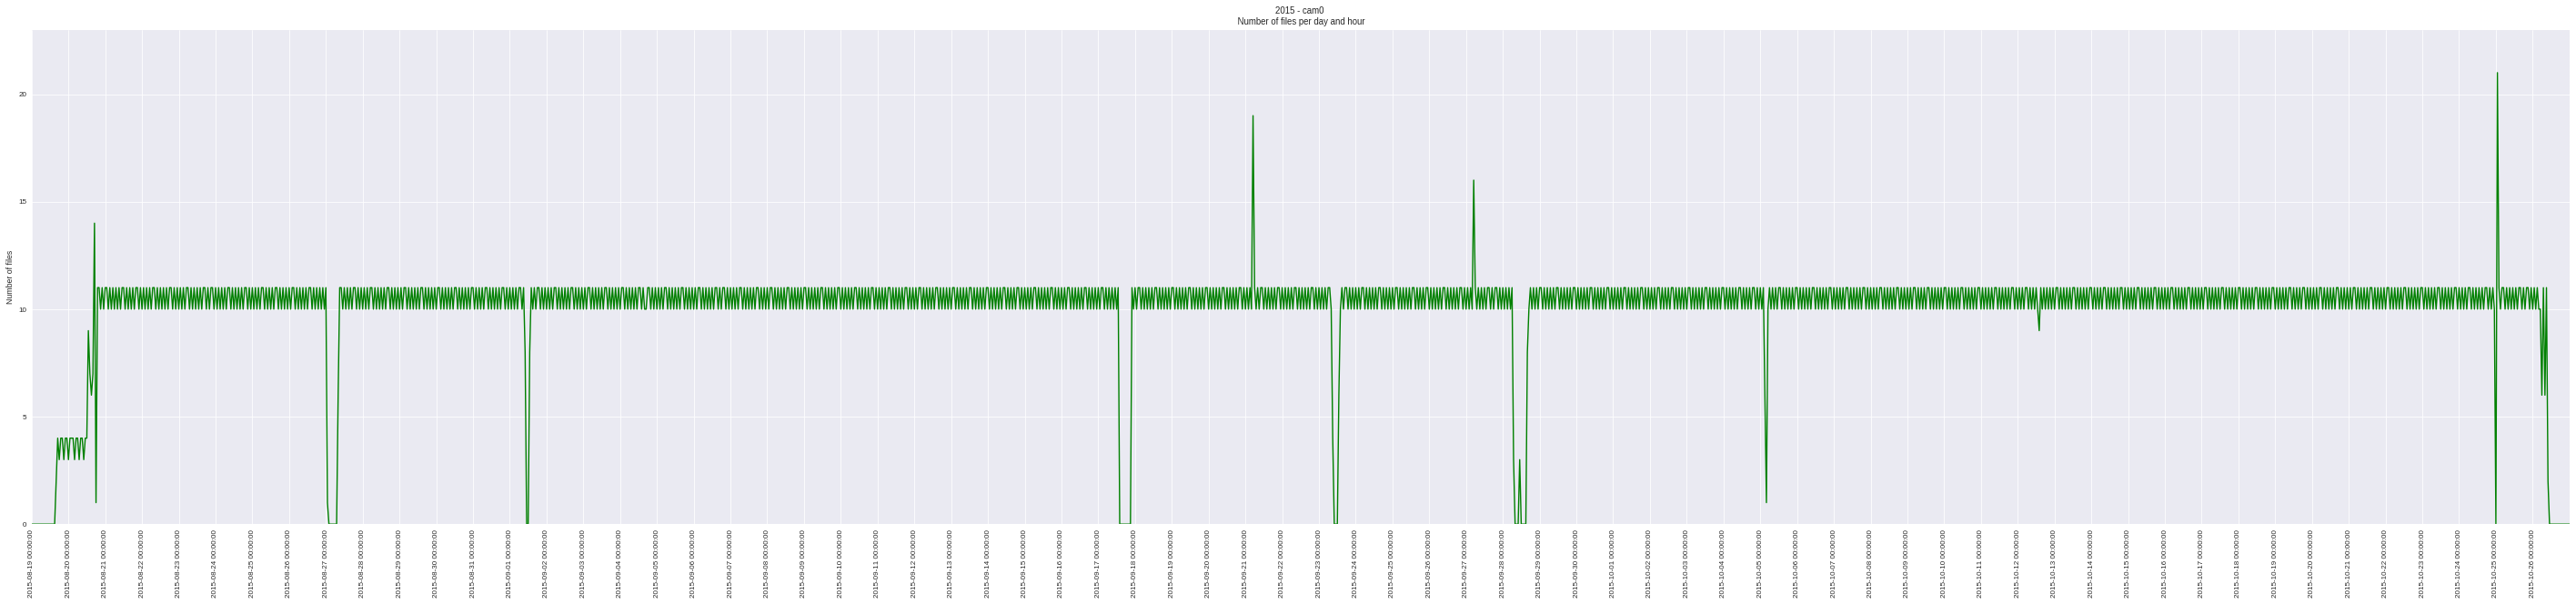

In [46]:
plotDF(df_all2, 'cam0', 2015, 0, 23)

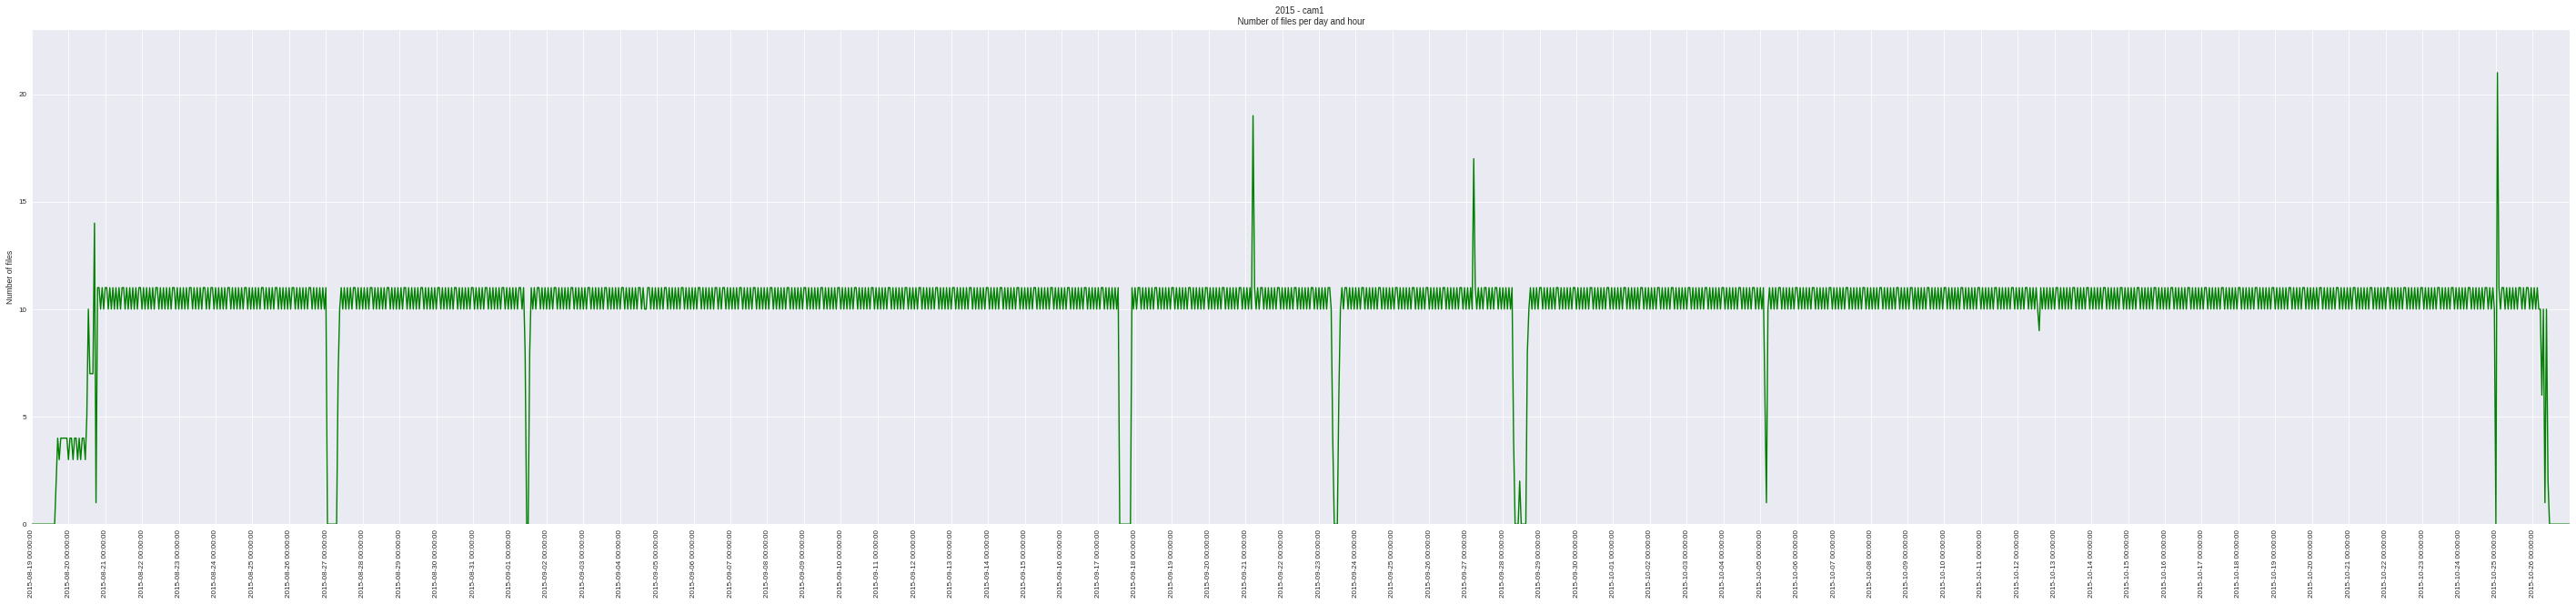

In [47]:
plotDF(df_all2, 'cam1', 2015, 0, 23)

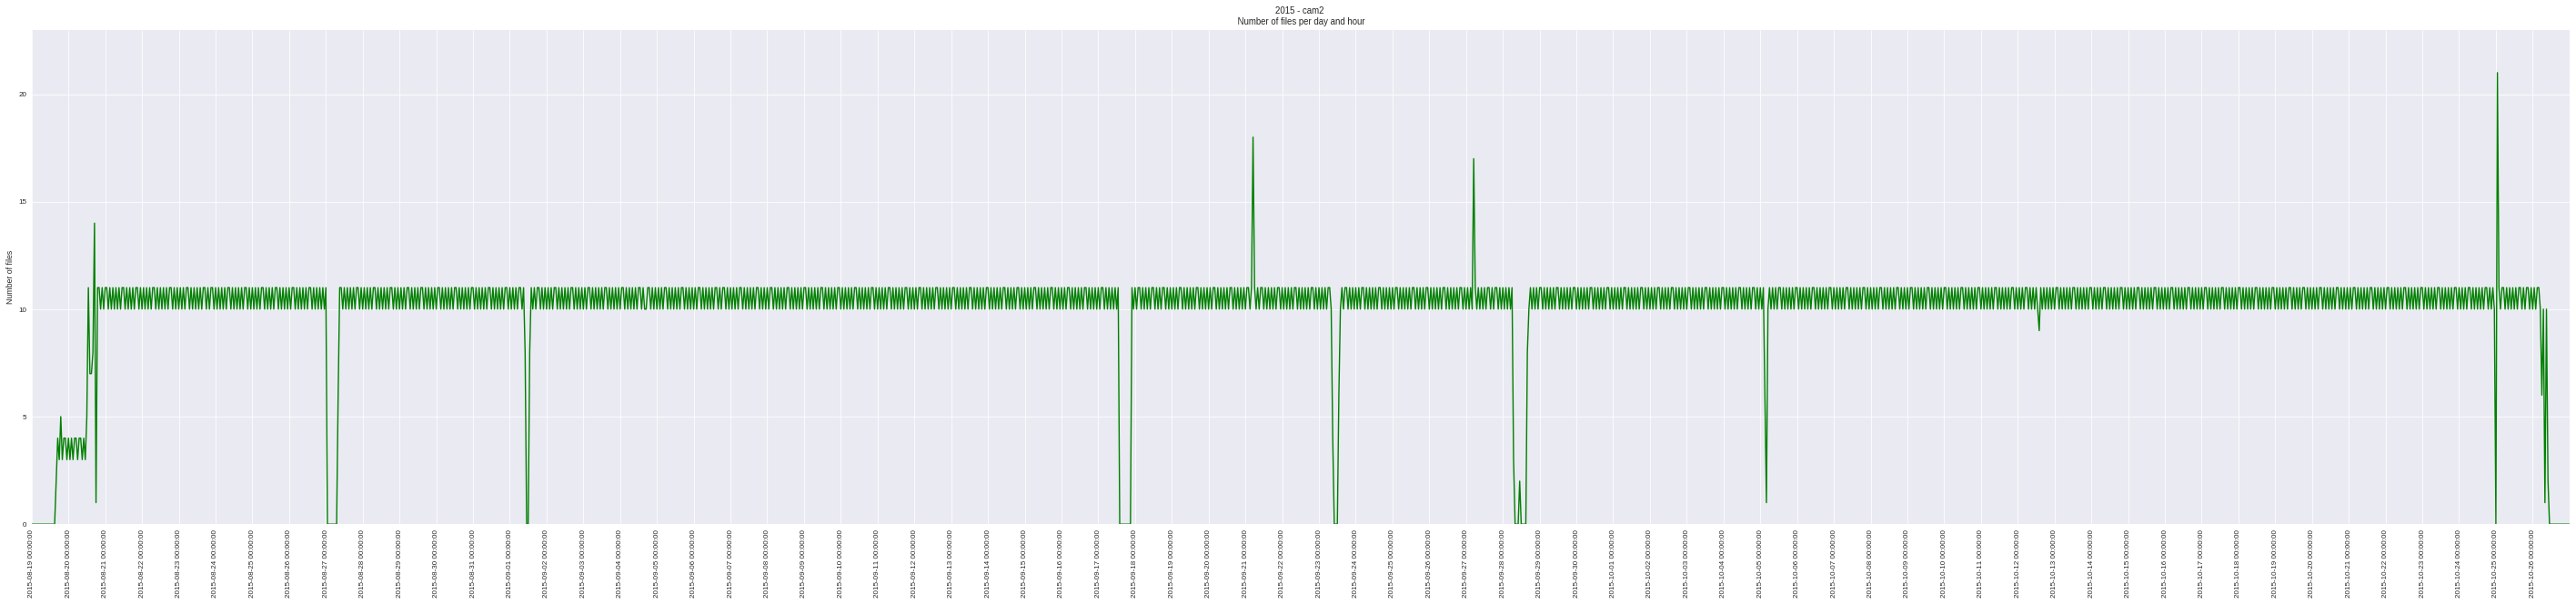

In [48]:
plotDF(df_all2, 'cam2', 2015, 0, 23)

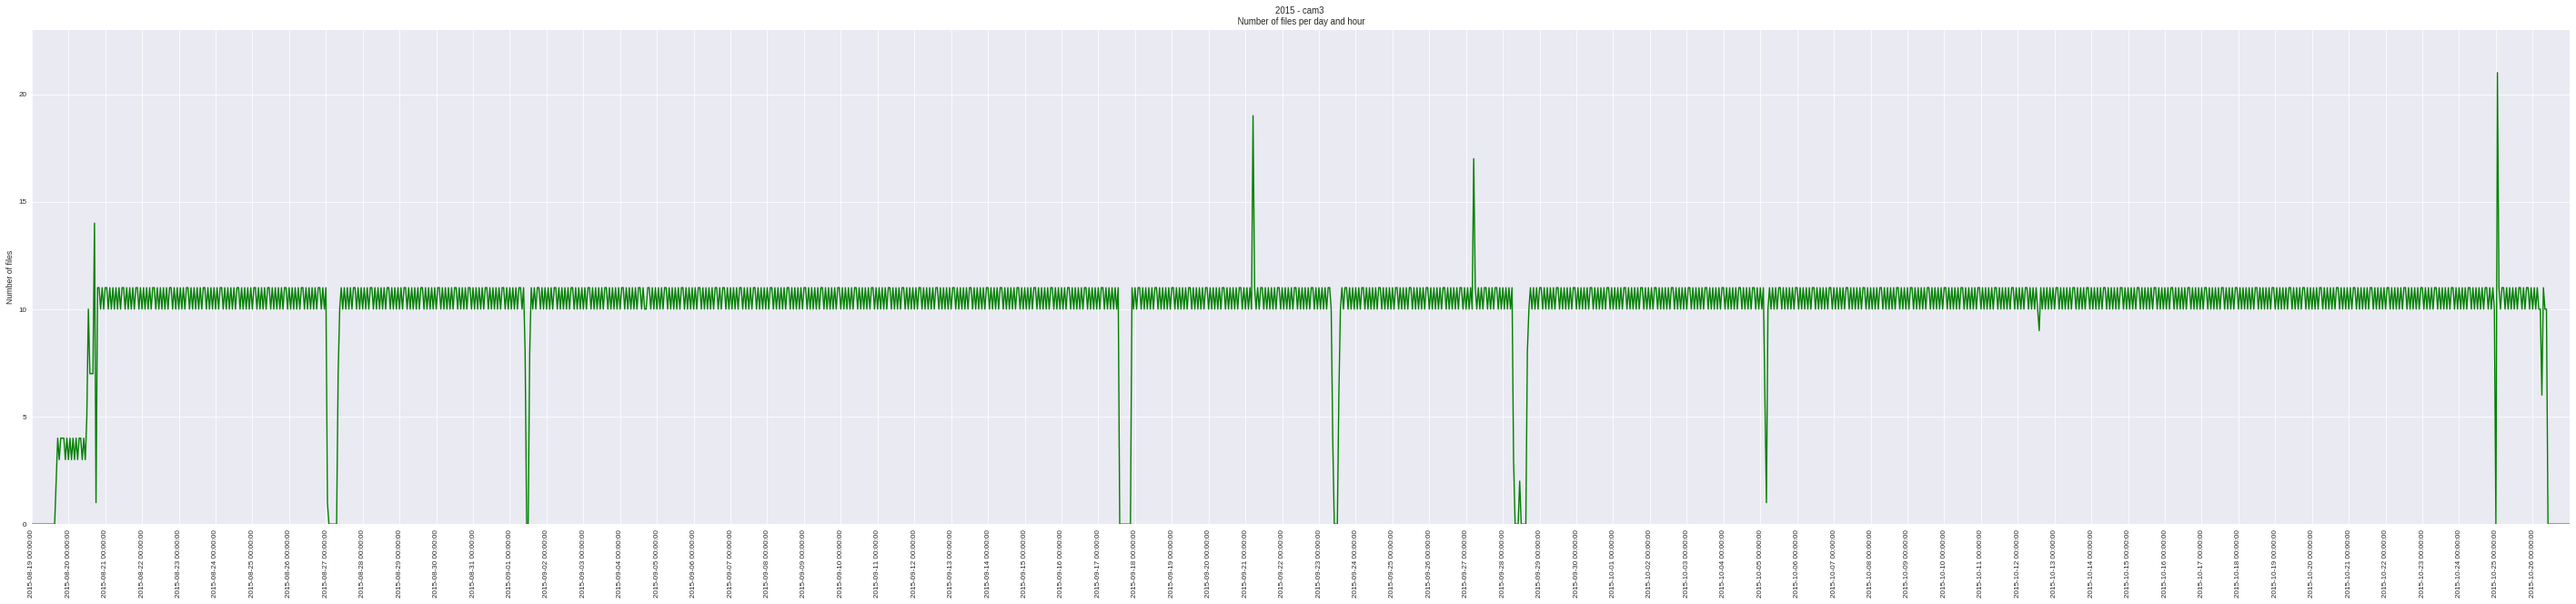

In [49]:
plotDF(df_all2, 'cam3', 2015, 0, 23)

## All Cams 2015

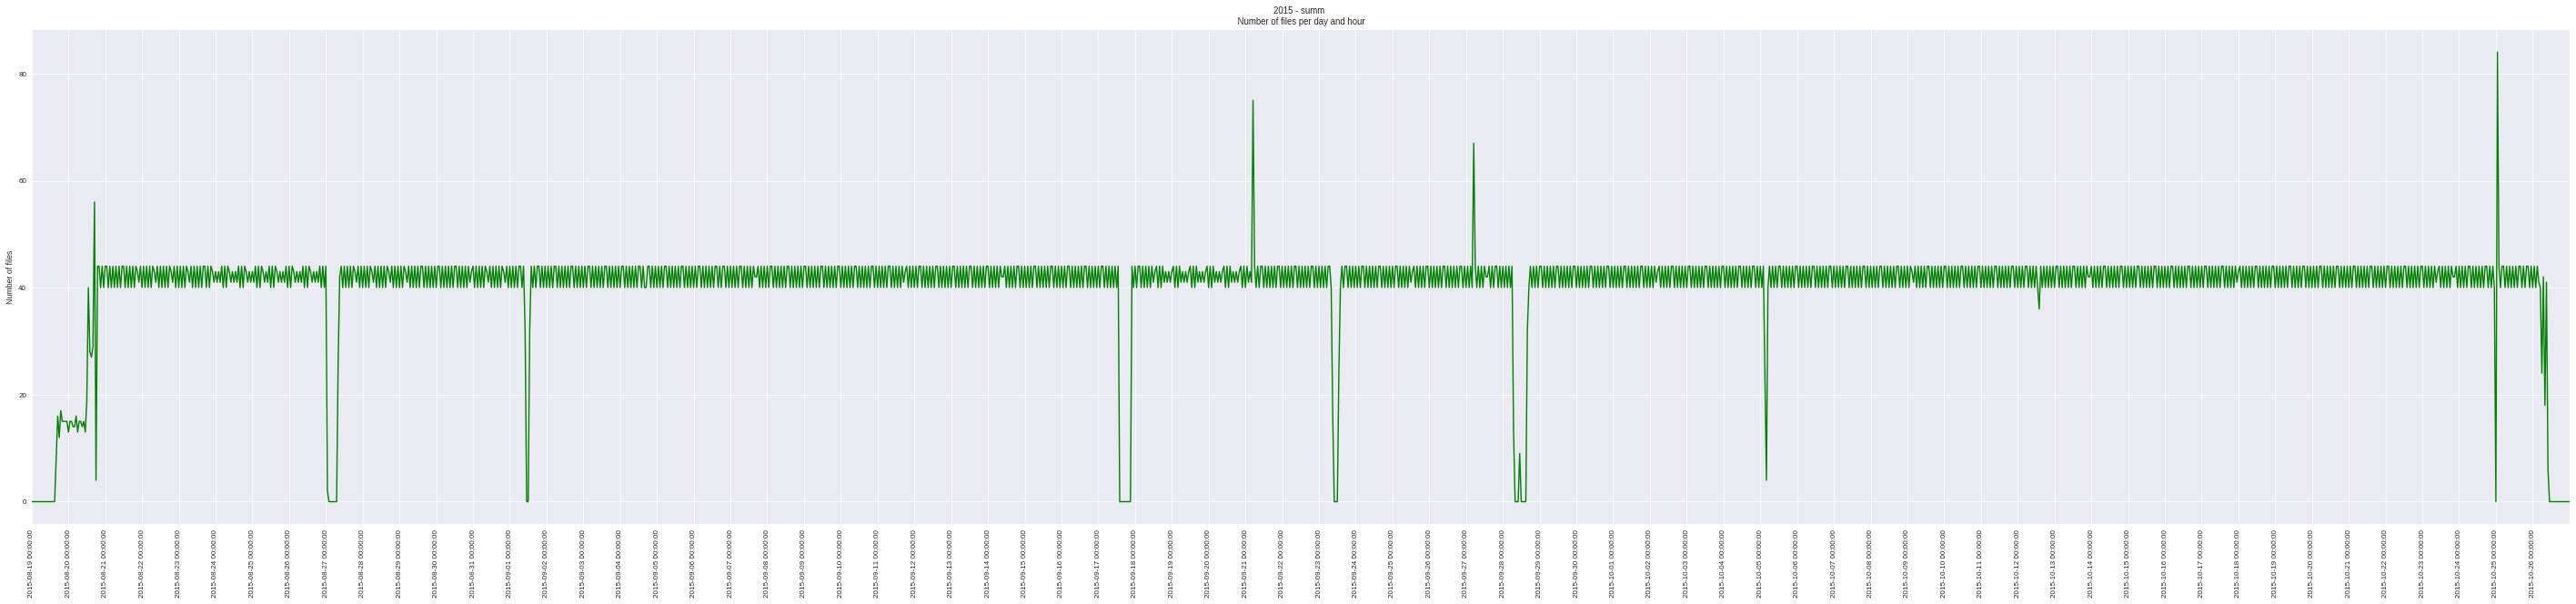

In [50]:
plotDF(df_all2, 'summ', 2015)